# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from citipy import citipy
# Import citipy to determine the cities based on latitude and longitude


### Generate the Cities List by Using the `citipy` Library

In [3]:
# output file
output_data_file = "output_data/cities.csv"

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind =  city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
       # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")       


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marsabit
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | al kharijah
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | vychegodskiy
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | sorong
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | nakuru
Processing Record 10 of Set 1 | cuyo
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | ketchikan
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | olyokminsk
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | whitehorse
Processing Record 20 of Set 1 | utrik
Processing Record 21 of Set 1 | howrah
Processing Record 22 of Se

Processing Record 39 of Set 4 | dubrovnik
Processing Record 40 of Set 4 | bethanie
Processing Record 41 of Set 4 | natitingou
Processing Record 42 of Set 4 | ntossoni
City not found. Skipping...
Processing Record 43 of Set 4 | egilsstadir
Processing Record 44 of Set 4 | howard springs
Processing Record 45 of Set 4 | santa ines
Processing Record 46 of Set 4 | alpena
Processing Record 47 of Set 4 | broken hill
Processing Record 48 of Set 4 | goianesia
Processing Record 49 of Set 4 | kotra
Processing Record 0 of Set 5 | espargos
City not found. Skipping...
Processing Record 1 of Set 5 | natchez
Processing Record 2 of Set 5 | natal
Processing Record 3 of Set 5 | papao
Processing Record 4 of Set 5 | adre
Processing Record 5 of Set 5 | hamilton
Processing Record 6 of Set 5 | holdrege
Processing Record 7 of Set 5 | bir hadaj
City not found. Skipping...
Processing Record 8 of Set 5 | portland
Processing Record 9 of Set 5 | mawu
Processing Record 10 of Set 5 | anloga
Processing Record 11 of Set

Processing Record 32 of Set 8 | al-`ula
City not found. Skipping...
Processing Record 33 of Set 8 | smilavicy
City not found. Skipping...
Processing Record 34 of Set 8 | colonia
Processing Record 35 of Set 8 | sao vicente
Processing Record 36 of Set 8 | itoman
Processing Record 37 of Set 8 | kargasok
Processing Record 38 of Set 8 | nueva guinea
Processing Record 39 of Set 8 | yakeshi
Processing Record 40 of Set 8 | saint-felicien
Processing Record 41 of Set 8 | rio grande
Processing Record 42 of Set 8 | bella union
Processing Record 43 of Set 8 | malabar
Processing Record 44 of Set 8 | mendi
Processing Record 45 of Set 8 | ta`u
Processing Record 46 of Set 8 | safi
Processing Record 47 of Set 8 | hami
Processing Record 48 of Set 8 | el factor
Processing Record 49 of Set 8 | chadron
Processing Record 0 of Set 9 | shadrinsk
Processing Record 1 of Set 9 | keren
Processing Record 2 of Set 9 | fisterra
Processing Record 3 of Set 9 | sungailiat
Processing Record 4 of Set 9 | luimneach
Process

Processing Record 22 of Set 12 | mananara
Processing Record 23 of Set 12 | tolanaro
Processing Record 24 of Set 12 | aginskoye
Processing Record 25 of Set 12 | sirte
Processing Record 26 of Set 12 | gueltat zemmour
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
  # Append the City information into city_data list
#city_data  = {     "City": city, 
                         # "Lat": city_lat, 
                         # "Lng": city_lng, 
                         # "Max Temp": city_max_temp,
                         # "Humidity": city_humidity,
                         # "Cloudiness": city_clouds,
                         # "Wind Speed": city_wind,
                         # "Country": city_country,
                         # "Date": city_date
        #
        

city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,marsabit,2.3284,37.9899,17.87,90,100,0.97,KE,1682446154
1,al kharijah,25.4514,30.5464,27.02,12,63,4.31,EG,1682446155
2,ushuaia,-54.8000,-68.3000,7.81,57,40,4.12,AR,1682445945
3,vychegodskiy,61.2470,46.8984,13.59,63,88,1.61,RU,1682446155
4,margaret river,-33.9500,115.0667,15.76,70,100,9.57,AU,1682446156


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marsabit,2.3284,37.9899,17.87,90,100,0.97,KE,1682446154
1,al kharijah,25.4514,30.5464,27.02,12,63,4.31,EG,1682446155
2,ushuaia,-54.8000,-68.3000,7.81,57,40,4.12,AR,1682445945
3,vychegodskiy,61.2470,46.8984,13.59,63,88,1.61,RU,1682446155
4,margaret river,-33.9500,115.0667,15.76,70,100,9.57,AU,1682446156


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

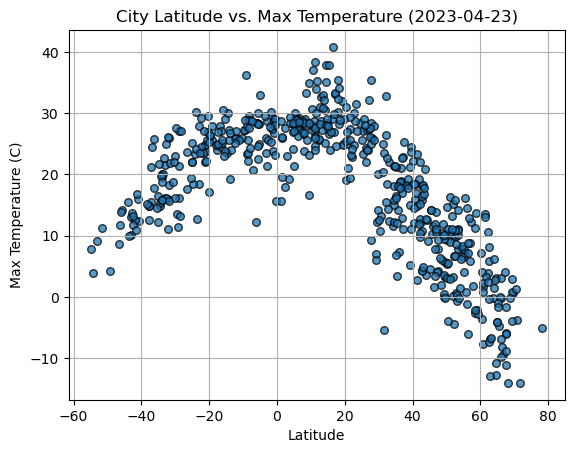

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],marker ='o',
           s=30, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2023-04-23)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

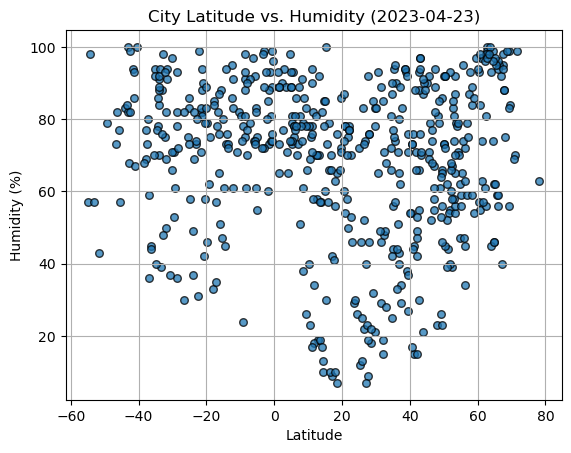

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],marker ='o',
           s=30, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-04-23)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

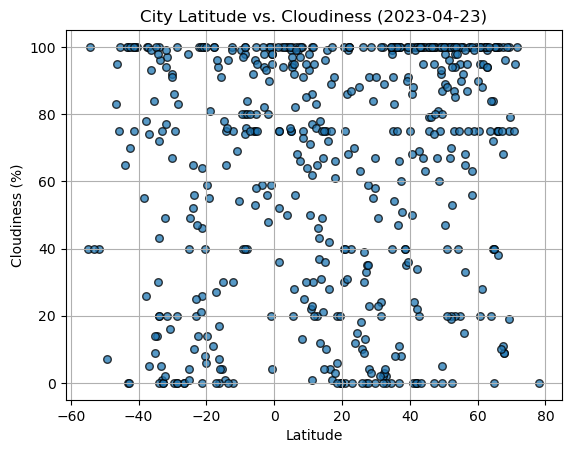

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],marker ='o',
           s=30, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-04-23)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

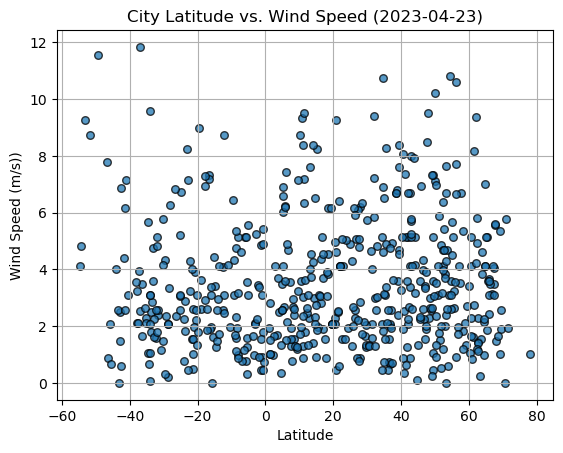

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],marker ='o',
           s=30, edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-04-23)')
plt.ylabel('Wind Speed (m/s))')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df =city_data_df.loc[(city_data_df['Lat'] >= 0 ),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marsabit,2.3284,37.9899,17.87,90,100,0.97,KE,1682446154
1,al kharijah,25.4514,30.5464,27.02,12,63,4.31,EG,1682446155
3,vychegodskiy,61.2470,46.8984,13.59,63,88,1.61,RU,1682446155
6,hawaiian paradise park,19.5933,-154.9731,24.94,86,0,2.06,US,1682446156
8,cuyo,10.8525,121.0086,28.72,75,22,9.34,PH,1682446157


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0 ),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,7.81,57,40,4.12,AR,1682445945
4,margaret river,-33.9500,115.0667,15.76,70,100,9.57,AU,1682446156
5,sorong,-0.8833,131.2500,26.82,81,59,0.90,ID,1682446156
7,nakuru,-0.2833,36.0667,15.59,96,100,0.74,KE,1682446157
9,waitangi,-43.9535,-176.5597,15.46,83,65,4.02,NZ,1682446158


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.749


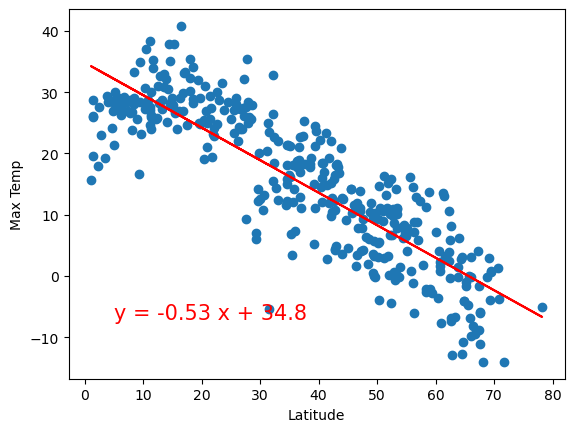

In [17]:
# Linear regression on Northern Hemisphere

(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(5, -7), fontsize=15, color ="r")
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()


The r-squared is: 0.584


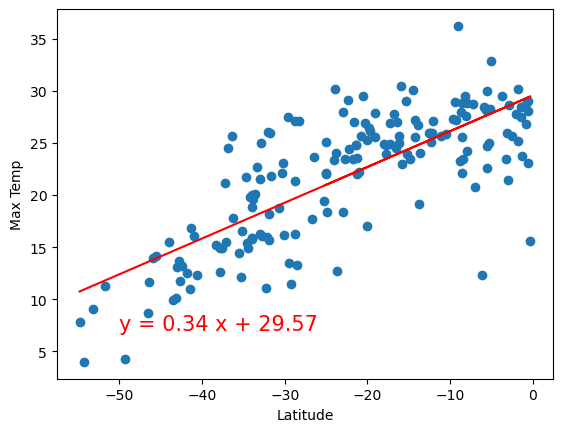

In [19]:
# Linear regression on Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(southern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(-50, 7), fontsize=15, color ="r")
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()


**Discussion about the linear relationship:** 
In northern Hemisphere , the regression value is 0.749. This means the strong relationship between Latitude and Max Temp. Temperature decreases also Latitude increases from the equator.
In southern Hemisphere , the regression value is 0.584. This means the week relationship between Latitude and Max Temp. Remperature increases , Latitude increses. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.022


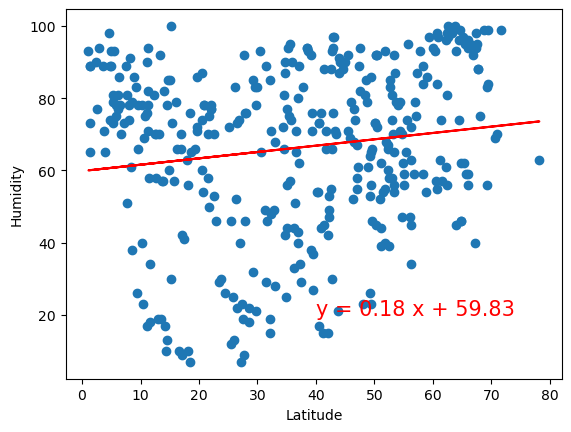

In [20]:
# Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(40, 20), fontsize=15, color ="r")
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()


The r-squared is: 0.011


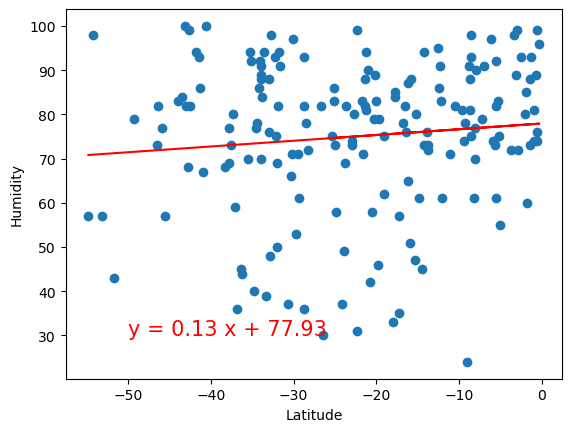

In [21]:
# Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(southern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(-50, 30), fontsize=15, color ="r")
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()

**Discussion about the linear relationship:**
In northern Hemisphere , the regression value is 0.022. This means very weak relationship between Latitude and Humidity. Humidity increases also Latitude increases from the equator. partially cities humid with highest %. partially less.
In southern Hemisphere , the regression value is 0.011. This means very week relationship between Latitude and Humidity. almost 70% cities affected with humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.023


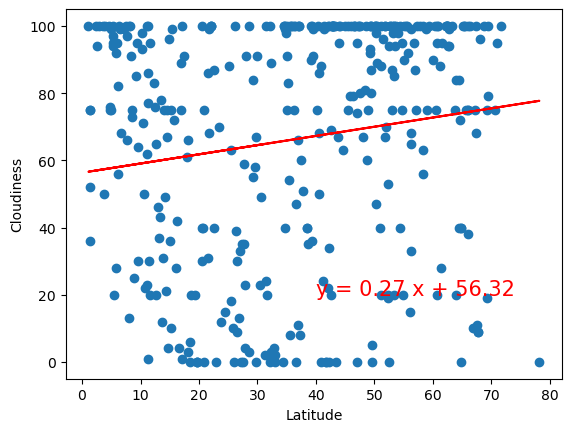

In [22]:
# Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(40, 20), fontsize=15, color ="r")
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()

The r-squared is: 0.018


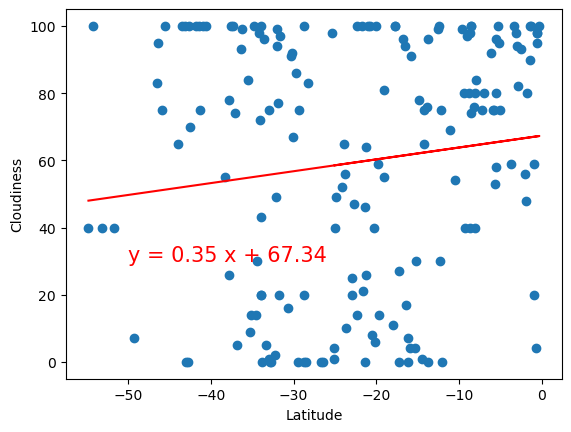

In [23]:
# Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(southern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(-50, 30), fontsize=15, color ="r")
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()

**Discussion about the linear relationship:**
In northern Hemisphere , the regression value is 0.023. This means very weak relationship between Latitude and Cloudiness. Cloudiness increases also Latitude increases from the equator. partially cities affected less cloudiness, the other cities are more cloudy.
In southern Hemisphere , the regression value is 0.017. This means very week relationship between Latitude and Cloudiness. Most cities affected cloudiness near the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0


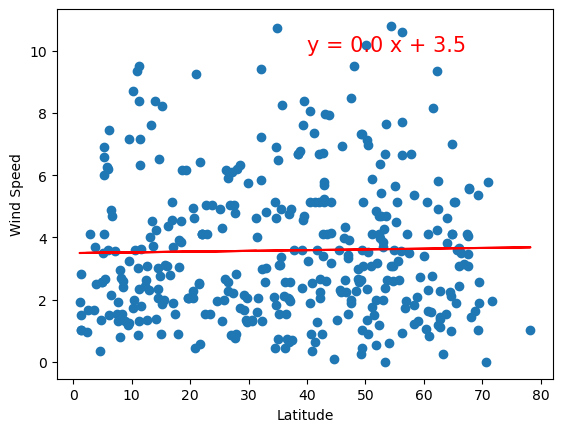

In [24]:
# Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(northern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(40, 10), fontsize=15, color ="r")
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()

The r-squared is: 0.035


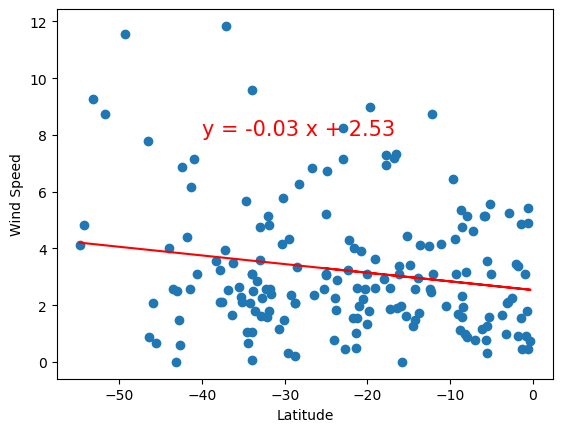

In [27]:
# Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(southern_hemi_df['Lat'], regress_values, "r-")
plt.annotate(line_eq,(-40, 8), fontsize=15, color ="r")
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()

**Discussion about the linear relationship:** 
In northern Hemisphere , the regression value is 0.0. This means very weak relationship between Latitude and Wind Speed. Wind Speed increases also Latitude increases from the equator. windspeed effected more cities in northern hemisphere.
In southern Hemisphere , the regression value is 0.035. This means very week relationship between Latitude and Wind Speed. Remperature decreases , Latitude decreases too. Latitude decreases away from the equator. wind speed is not that much effected in southern hemisphere cities compared to northern.